In [12]:
from PIL import Image, ImageDraw
import glob
import os
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

import numpy as np
import scipy.misc as smp

import json
from datetime import datetime

from operator import add

In [13]:
TILE_X = 7680
TILE_Y = 10240
TILE_WIDTH_PX = 512
TILE_HEIGHT_PX = 512

In [14]:
def get_mask_path(tile_x, tile_y, mask_type):
    path = f"./data/sentinel-2a-tile-{tile_x}x-{tile_y}y/masks/{mask_type}-mask.png"
    return path

In [15]:
mask_path = get_mask_path(TILE_X, TILE_Y, "sugarcane-region")

In [16]:
img = Image.open(mask_path)
pixels = img.load()

In [7]:
type(pixels)

PixelAccess

In [17]:
# why is alpha 255?  alpha range from 0 to 255 (also range from 0 to 1)
# 0 being completely transparent, 255 being completely opaque
# (0,0,0,255) means black

mask_list = []

for x in range(0,512):
    for y in range(0,512):
        if pixels[y,x] == (0,0,0,255):
#             print("X",end="")
            mask_list.append((y,x))
#         else:
#             print(" ",end="")
#         print(pixels[y,x])
print("end")
print(len(mask_list))

end
184676


In [9]:
mask_list[0]

(0, 0)

In [10]:
# What is band? 
# 994 images across 12 bands

# What is TCI? 


In [18]:
def get_timeseries_image_paths(tile_x, tile_y, band):
    path = f"./data/sentinel-2a-tile-{tile_x}x-{tile_y}y/timeseries/{tile_x}-{tile_y}-{band}*.png"
    images = glob.glob(path)
    return images

In [22]:
band_img = get_timeseries_image_paths(TILE_X, TILE_Y, "TCI")
# band_img = get_timeseries_image_paths(TILE_X, TILE_Y, "B04")
# need to sort the band_img list

In [23]:
# sort the image path according to timeseries
image_path_dict = {}
for bi in band_img:
    timestr = bi[63:73]
    t = datetime.strptime(timestr, '%Y-%m-%d')
    image_path_dict[t] = bi

image_path_dict

{datetime.datetime(2017, 8, 19, 0, 0): './data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-TCI-2017-08-19.png',
 datetime.datetime(2017, 6, 20, 0, 0): './data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-TCI-2017-06-20.png',
 datetime.datetime(2017, 1, 1, 0, 0): './data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-TCI-2017-01-01.png',
 datetime.datetime(2016, 12, 22, 0, 0): './data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-TCI-2016-12-22.png',
 datetime.datetime(2017, 11, 7, 0, 0): './data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-TCI-2017-11-07.png',
 datetime.datetime(2019, 1, 21, 0, 0): './data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-TCI-2019-01-21.png',
 datetime.datetime(2018, 12, 2, 0, 0): './data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-TCI-2018-12-02.png',
 datetime.datetime(2018, 5, 26, 0, 0): './data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-TCI-2018-05-26.png',
 datetime.datetime(2019, 4, 11, 0, 0): '

In [8]:
for elem in sorted(image_path_dict.keys()):
    print(image_path_dict[elem])
    break

./data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-B04-2016-12-22.png


In [24]:
date1 = datetime(2016, 12, 22, 0, 0)
img = Image.open(image_path_dict[date1])
band_pixels = img.load()

type(band_pixels[0,0])

tuple

In [25]:
# print out value for visualization

for x in range(0,512):
    for y in range(0,512):
#         if pixels[y,x] == (0,0,0,255):
#             print("X",end="")
#         else:
#             print(" ",end="")
        print(band_pixels[y,x])
    print("end")
    break

# from intensity to rgb ?  1766 

(100, 104, 111)
(98, 103, 113)
(89, 98, 106)
(88, 97, 107)
(87, 96, 106)
(85, 95, 106)
(85, 97, 105)
(84, 98, 108)
(87, 100, 107)
(91, 104, 110)
(94, 106, 111)
(94, 107, 112)
(92, 107, 112)
(92, 108, 112)
(93, 108, 111)
(92, 108, 110)
(96, 112, 112)
(96, 113, 112)
(92, 114, 112)
(91, 114, 111)
(92, 114, 111)
(93, 116, 112)
(93, 112, 113)
(93, 111, 114)
(98, 111, 116)
(119, 125, 127)
(102, 113, 121)
(89, 104, 112)
(92, 109, 115)
(95, 111, 115)
(92, 110, 114)
(90, 110, 113)
(91, 111, 114)
(91, 110, 114)
(90, 109, 113)
(89, 110, 113)
(89, 110, 114)
(89, 110, 114)
(91, 108, 113)
(93, 109, 116)
(97, 114, 117)
(100, 115, 119)
(98, 114, 119)
(94, 114, 120)
(94, 116, 122)
(104, 121, 127)
(112, 130, 136)
(119, 136, 146)
(128, 142, 151)
(133, 150, 156)
(140, 157, 165)
(159, 169, 174)
(173, 183, 191)
(178, 186, 194)
(180, 188, 199)
(184, 188, 201)
(200, 203, 211)
(212, 213, 218)
(223, 222, 227)
(225, 228, 230)
(214, 218, 225)
(213, 212, 220)
(222, 218, 225)
(224, 221, 227)
(218, 218, 223)
(215, 2

In [47]:
# get time series for TCI
timeseries_list = []
for bi in band_img:
    timestr = bi[63:73]
    timeseries_list.append(timestr)

# timeseries_list

In [48]:
timeseries_list.sort(key = lambda date: datetime.strptime(date, '%Y-%m-%d'))

In [49]:
len(timeseries_list)

71

In [28]:
# store sugacrane pixel to tci_list
tci_list = []

for mask_ind in mask_list:
    y = mask_ind[0]
    x = mask_ind[1]
    
    tci_list.append(band_pixels[y,x])

print(len(tci_list))

184676


In [29]:
# store sugacrane pixel to tci_list, then store all the tci images to tci_dict, 
# key is timestamp, value is tci_list
tci_dict = {}
cnt = 0
for elem in tqdm(sorted(image_path_dict.keys())):
    path = image_path_dict[elem]

    img = Image.open(path)
    band_pixels = img.load()
    
    tci_list = []
    for mask_ind in mask_list:
        y = mask_ind[0]
        x = mask_ind[1]

        tci_list.append(band_pixels[y,x])
    tci_dict[cnt] = tci_list
    cnt += 1



In [23]:
len(tci_dict)

71

In [30]:
# i range from 0 - 184675
# i represent which pixel on mask image, that is a sugacrane pixel
def which_pixel_over_timeseries(i):
    red_list = []
    green_list = []
    blue_list = []
    for key, value in tci_dict.items():
    #     print(len(value))    # 184676
        color = value[i]      # this is the ith pixel 
        red_list.append(color[0])
        green_list.append(color[1])
        blue_list.append(color[2])
    #     print(color)
    
    return {"red_list":red_list, "green_list":green_list,"blue_list":blue_list}


In [31]:
# look at first pixel over the timeseries, i = 0
color_dict = which_pixel_over_timeseries(0)
red_list = color_dict["red_list"]
green_list = color_dict["green_list"]
blue_list = color_dict["blue_list"]
print(len(red_list))

71


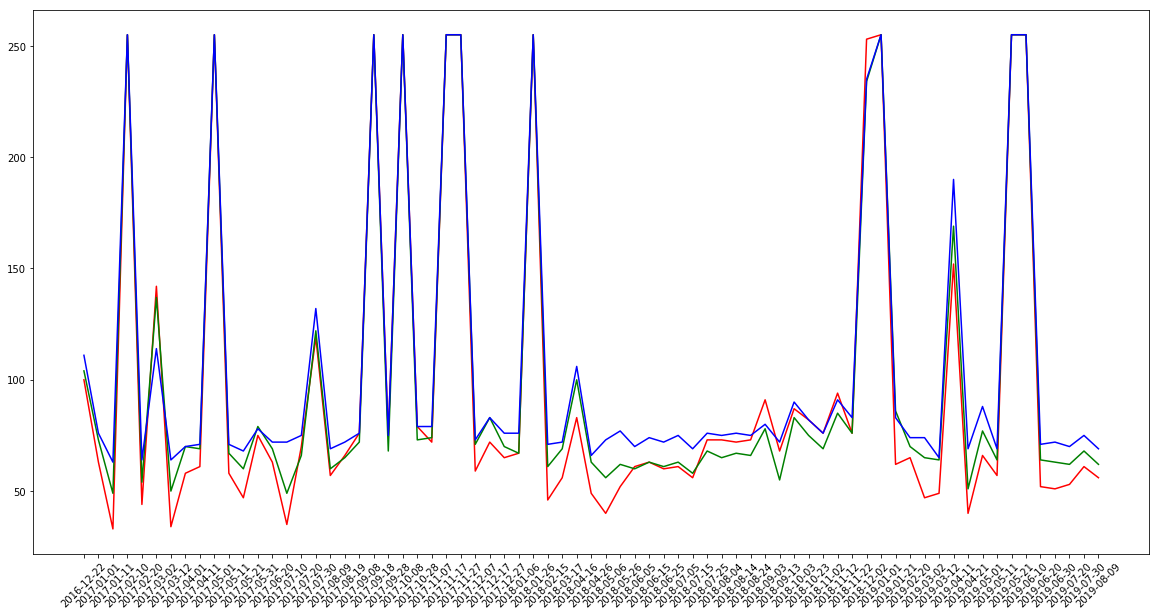

In [32]:
plt.figure(figsize=(20,10))
plt.plot(timeseries_list,red_list, 'r')
plt.plot(timeseries_list,green_list, 'g')
plt.plot(timeseries_list,blue_list, 'b')
plt.xticks(rotation=45)
plt.show()

In [33]:
# for identifying cloud
def is_white_pixel(r,g,b):
    if r >= 225 and g >= 225 and b >= 225:
        return True
    return False
    

In [34]:
# for identifying cloud
def is_blue_pixel(r,g,b):
    total = r + g + b
    if b > 180 and b / total > 0.35:
        return True
    return False

In [35]:
# remove cloud effect 
# select which tci image that has cloud cover on certain pixel, e.g. pixel i = 0, first pixel
cloud_list = []
for i in range(0,71):
    r = red_list[i]
    g = green_list[i]
    b = blue_list[i]
    #or is_blue_pixel(r,g,b)
    if is_white_pixel(r,g,b) or is_blue_pixel(r,g,b):
        cloud_list.append(i)

print(cloud_list)
cloud_list.sort(reverse=True)
print(cloud_list)

[3, 9, 20, 22, 25, 26, 31, 54, 55, 60, 64, 65]
[65, 64, 60, 55, 54, 31, 26, 25, 22, 20, 9, 3]


In [37]:
timeseries_list_tmp = timeseries_list
print(len(timeseries_list_tmp))
for i in cloud_list:
    timeseries_list_tmp.pop(i)

print(len(timeseries_list_tmp))

59


IndexError: pop index out of range

In [38]:
# remove cloud pixel positions from color pixel list 

for key,value in color_dict.items():
    print(len(value), end=" ")
    for i in cloud_list:
        value.pop(i)
    print(len(value), end=" ")

71 59 71 59 71 59 

In [39]:
red_list = color_dict["red_list"]
green_list = color_dict["green_list"]
blue_list = color_dict["blue_list"]

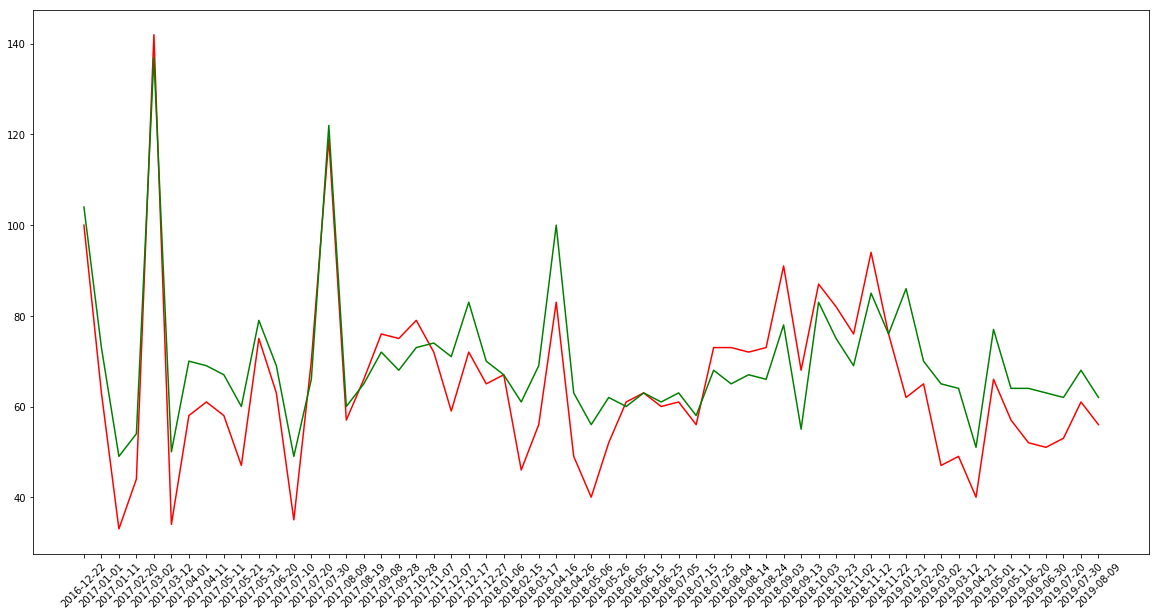

In [40]:
plt.figure(figsize=(20,10))
plt.plot(timeseries_list,red_list, 'r')
plt.plot(timeseries_list,green_list, 'g')
# plt.plot(timeseries_list,blue_list, 'b')
plt.xticks(rotation=45)
plt.show()

In [64]:
# 

In [34]:
# draw color change over timeseries
num_images = len(color_dict["red_list"])
print(num_images)

data = np.zeros( (150,num_images*10,3), dtype=np.uint8 )

# data[512,512] = (254,0,0)       # Makes the middle pixel red
# data[512,513] = (0,0,255)       # Makes the next pixel blue

for x in range(0,150):
    for y in range(0,num_images):
        for k in range(0,10):
            data[x,y*10+k] = (color_dict["red_list"][y], color_dict["green_list"][y], color_dict["blue_list"][y])

img = smp.toimage( data )
img.show()

59


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  from ipykernel import kernelapp as app


In [35]:
# redraw the image
data = np.zeros( (512,512,3), dtype=np.uint8 )
cnt = 0
# for i in range(0,512):
#     for j in range(0,512):
#         if (j,i) not in mask_list:
#             continue
#         data[j,i] = tci_dict[3][cnt]
#         cnt += 1

for mask_ind in mask_list:
    y = mask_ind[0]
    x = mask_ind[1]
    data[x,y] = tci_dict[3][cnt]
    cnt += 1
        
img = smp.toimage( data )
img.show()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


In [ ]:
# How to identify whether a pixel is green (has sugacrane) or brown (harvested)?




In [36]:
# explore rgb values 
rgb_list = []
for i in range(0, len(red_list)):
    r = red_list[i]
    g = green_list[i]
    b = blue_list[i]
    rgb_list.append( (r,g,b) )

# rgb_list

In [37]:
rgb_list[51]

(40, 51, 69)

In [38]:
51 / (40+51+69)

0.31875

In [41]:
# this function needs more modifications !!!!!

def is_green_pixel(r,g,b):
    total = r + g + b
    if g / total > 0.33334:
        return True
    return False


In [42]:
l = len(timeseries_list)
glist = [0] * l
for i in range(0, l):
    r = red_list[i]
    g = green_list[i]
    b = blue_list[i]
    
    if is_green_pixel(r,g,b):
        glist[i] = 1
    
# glist

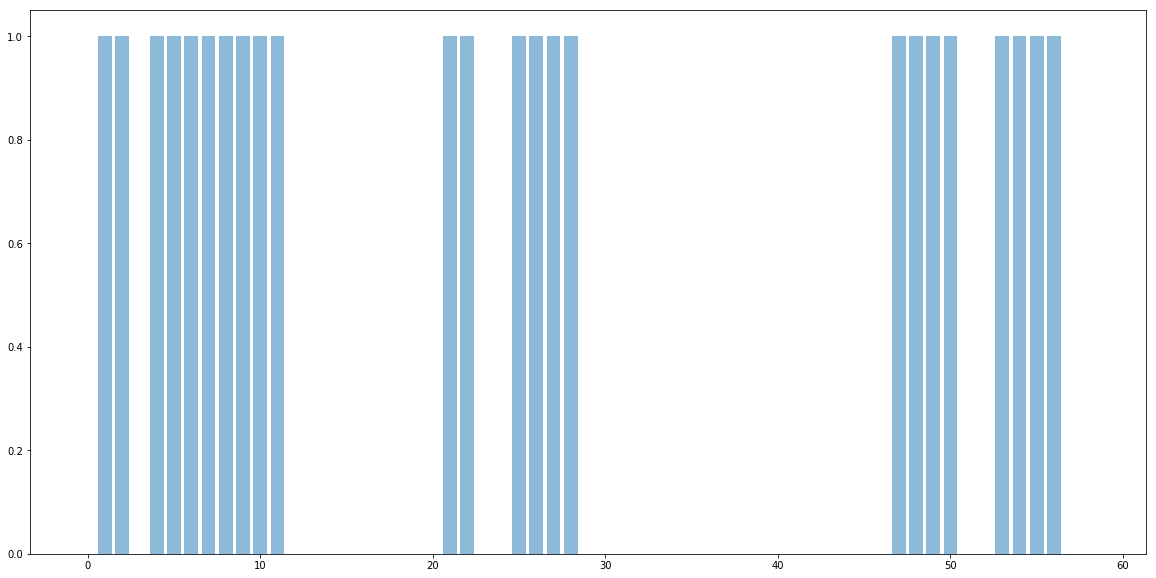

In [41]:
plt.figure(figsize=(20,10))
# x = timeseries_list
x = range(0,len(timeseries_list))
plt.bar(x,glist, align='center', alpha=0.5)
# plt.xticks(rotation=45)
plt.show()

In [43]:
# output csv for futher processing 

# 71 days in total 
# for each day, need to calculate total pixel number that are green - total sugacrane area 

green_sum = [0] * 71

for i in tqdm(range(0, len(mask_list))):
    # run over 184676 mask pixels 
    
    color_dict = which_pixel_over_timeseries(i)
    red_list = color_dict["red_list"]    # len = 71
    green_list = color_dict["green_list"]
    blue_list = color_dict["blue_list"]
    
    # if encounter cloud, then use adjacent color. (the previous image or the next image)
    cloud_list = []
    for j in range(0,71):
        r = red_list[j]
        g = green_list[j]
        b = blue_list[j]
        if is_white_pixel(r,g,b) or is_blue_pixel(r,g,b):
            cloud_list.append(j)
    
    for key,value in color_dict.items():
        for k in cloud_list:
            if k == 0:
                kk = k + 1
                while kk in cloud_list:
                    kk += 1
                    if kk == len(value):
                        break
                value[k] = value[kk]
            else:
                kk = k - 1
                while kk in cloud_list:
                    kk -= 1
                    if kk == 0:
                        break
                value[k] = value[kk]
    
    # len(red_list) should be still 71
    red_list = color_dict["red_list"]
    green_list = color_dict["green_list"]
    blue_list = color_dict["blue_list"]
    
    l = 71
    glist = [0] * l
    for h in range(0, l):
        r = red_list[h]
        g = green_list[h]
        b = blue_list[h]

        if is_green_pixel(r,g,b):
            glist[h] = 1
    
    green_sum = list( map(add, green_sum, glist) )
    

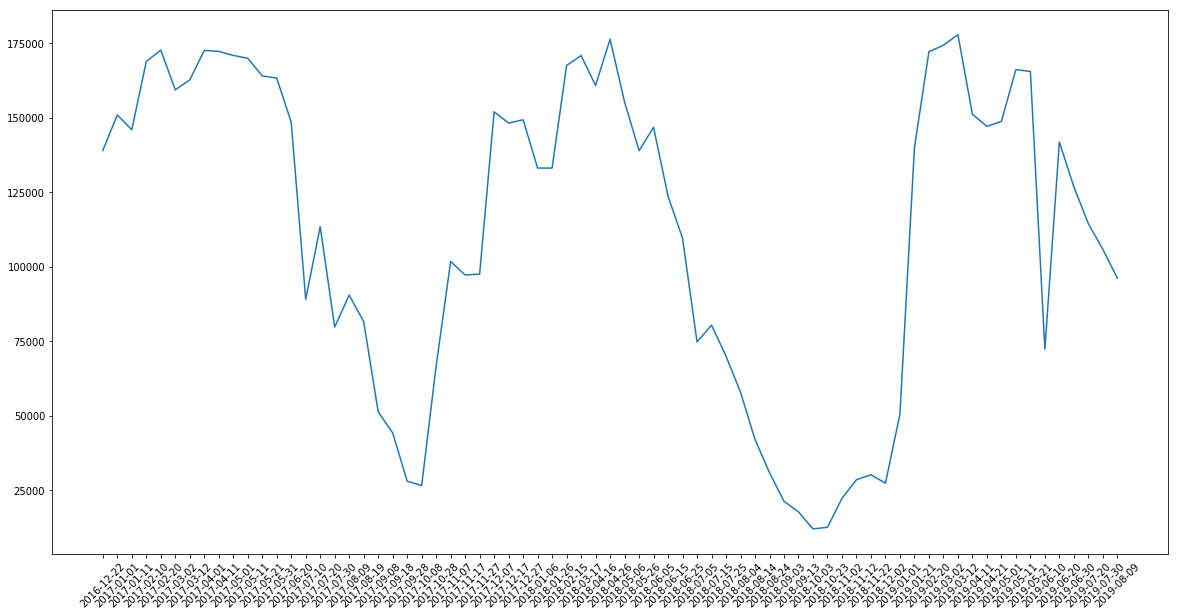

In [51]:
# total sugacrane pixel number VS. days

plt.figure(figsize=(20,10))
# x = range(0,71)
x = timeseries_list
plt.plot(x,green_sum)
plt.xticks(rotation=45)
plt.show()